## Planets 
data source: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib.cm import viridis
df = pd.read_csv('PSCompPars.csv', on_bad_lines='skip')
df.head(5)

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,0.06000,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20000,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.76000,0.11000,...,-0.7140,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,1.67709,...,-0.0073,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00000,...,-0.0111,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603


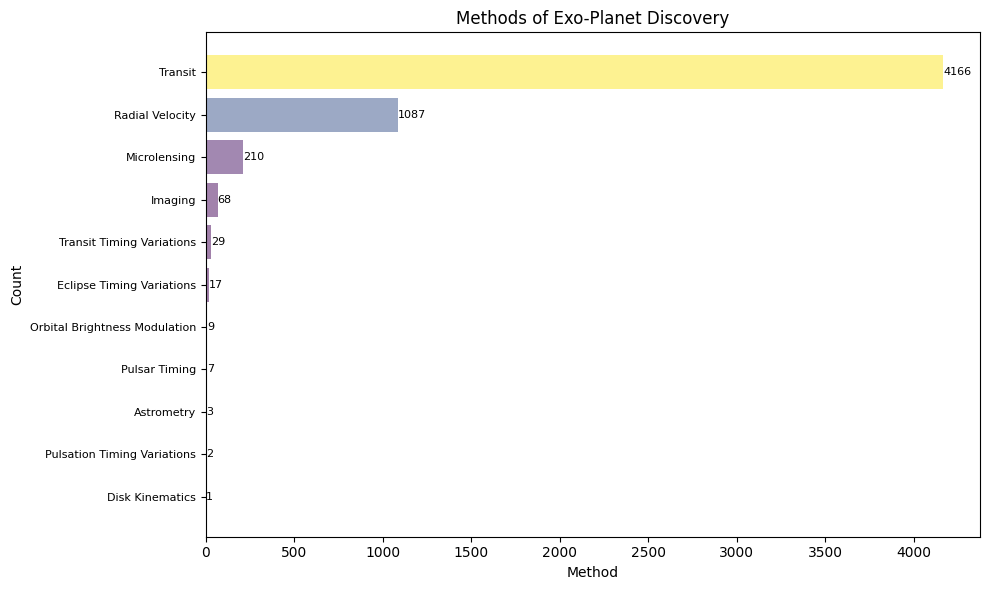

In [156]:
disc_methods = df.groupby('discoverymethod').size()
disc_methods = disc_methods.reset_index()
disc_methods.columns = ['Discovery Method','Count']

disc_methods.columns = ['Discovery Method', 'Count']

# Sorting by count in descending order
disc_methods = disc_methods.sort_values(by='Count', ascending=True)

# Colormap 
colors = viridis(disc_methods['Count'] / disc_methods['Count'].max())

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(disc_methods['Discovery Method'], disc_methods['Count'], color=colors, alpha = 0.5)
plt.xlabel('Method')
plt.ylabel('Count')
plt.title('Methods of Exo-Planet Discovery')
plt.yticks(fontsize=8)



# Adding count amount on top of each bar
for bar, count in zip(bars, disc_methods['Count']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, count,
             va='center', ha='left', fontsize=8)
        
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



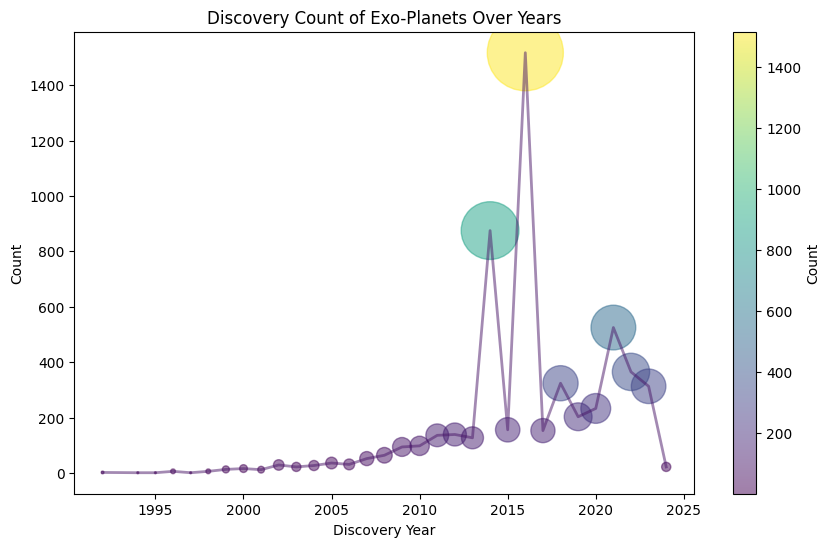

In [118]:
# Discovery Year Scatter Chart
disc_year = df.groupby('disc_year').size()
disc_year = disc_year.reset_index()
disc_year.columns = ['Discovery Year','Count']
d_normal = disc_year['Count'] / disc_year['Count'].max()
c_d = disc_year['Count']

plt.figure(figsize=(10,6))
plt.scatter(disc_year['Discovery Year'],disc_year['Count'],
            c = c_d,
            alpha = 0.5,
            s = (d_normal *3000))
plt.plot(disc_year['Discovery Year'],disc_year['Count'],color = '#481567ff', alpha=0.5, linewidth =2)

plt.xlabel('Discovery Year')
plt.ylabel('Count')
plt.title('Discovery Count of Exo-Planets Over Years')

plt.colorbar(label='Count')

plt.show()

In [ ]:
#recent discovereis (w/in last 5 years)
recent_disc = df[df['disc_year'] > 2019]
recent_disc = recent_disc.sort_values('disc_year', ascending = False)
recent_disc

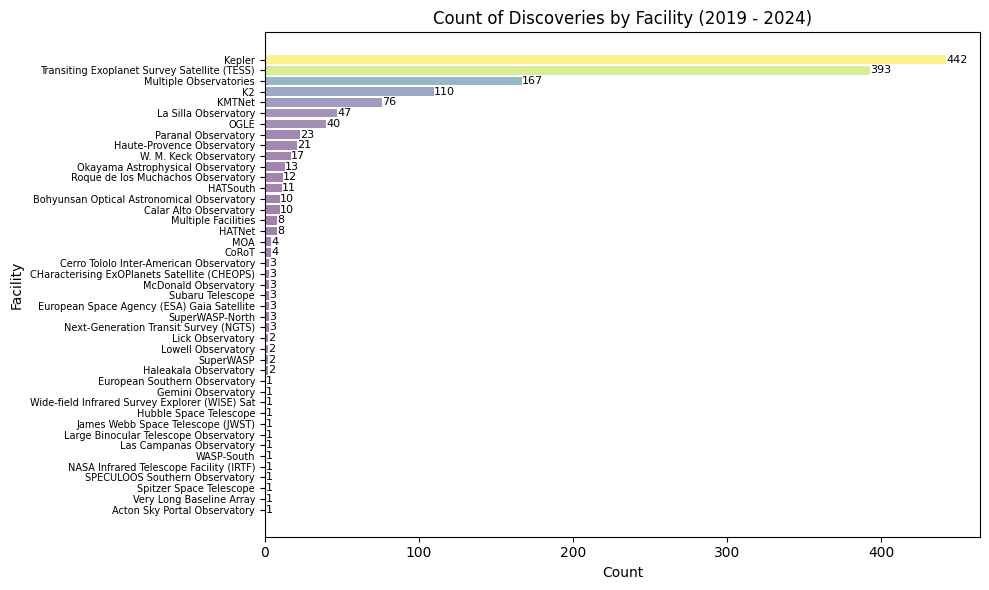

In [154]:
disc_fac = recent_disc.groupby('disc_facility').size()
disc_fac = disc_fac.reset_index()
disc_fac.columns = ['Discovery Facility', 'Count']
disc_fac = disc_fac.sort_values('Count', ascending=True)
disc_fac = disc_fac.reset_index(drop=True)

colors = viridis(disc_fac['Count'] / disc_fac['Count'].max())

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(disc_fac['Discovery Facility'], disc_fac['Count'], color=colors, alpha = 0.5)
plt.xlabel('Count')
plt.ylabel('Facility')
plt.yticks(fontsize=7)
plt.title('Count of Discoveries by Facility (2019 - 2024)')

# Adding count amount on top of each bar
for bar, count in zip(bars, disc_fac['Count']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, count,
             va='center', ha='left', fontsize=8)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Method of discovery by year 

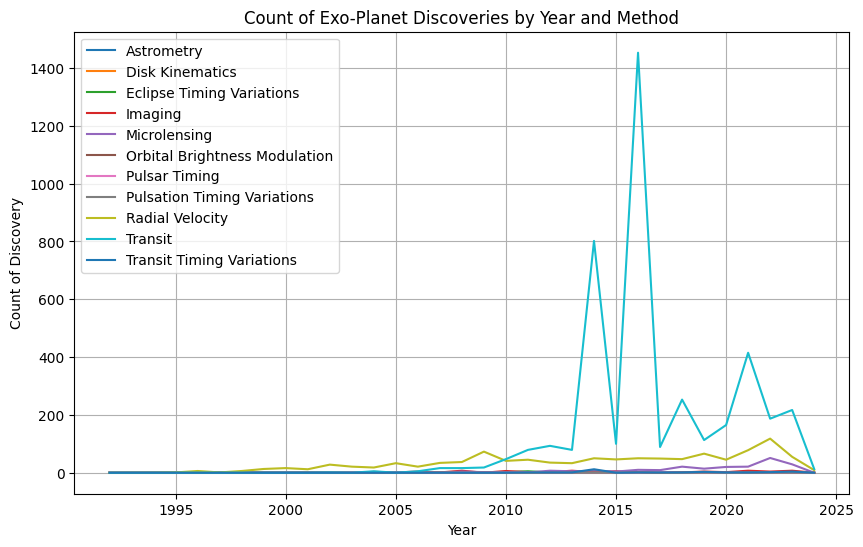

In [165]:
# Group by 'discoverymethod' and 'disc_year', and calculate the count of each group
grouped_data = df.groupby(['discoverymethod', 'disc_year']).size().reset_index(name='count')

# Pivot the data to have 'discoverymethod' as columns and 'disc_year' as index
pivot_data = grouped_data.pivot(index='disc_year', columns='discoverymethod', values='count').fillna(0)

# Plotting
plt.figure(figsize=(10, 6))

for i, column in enumerate(pivot_data.columns):
    plt.plot(pivot_data.index, pivot_data[column], label=column)  # Adjust color by dividing i by total number of columns

plt.xlabel('Year')
plt.ylabel('Count of Discovery')
plt.title('Count of Exo-Planet Discoveries by Year and Method')
plt.legend()
plt.grid(True)
plt.show()

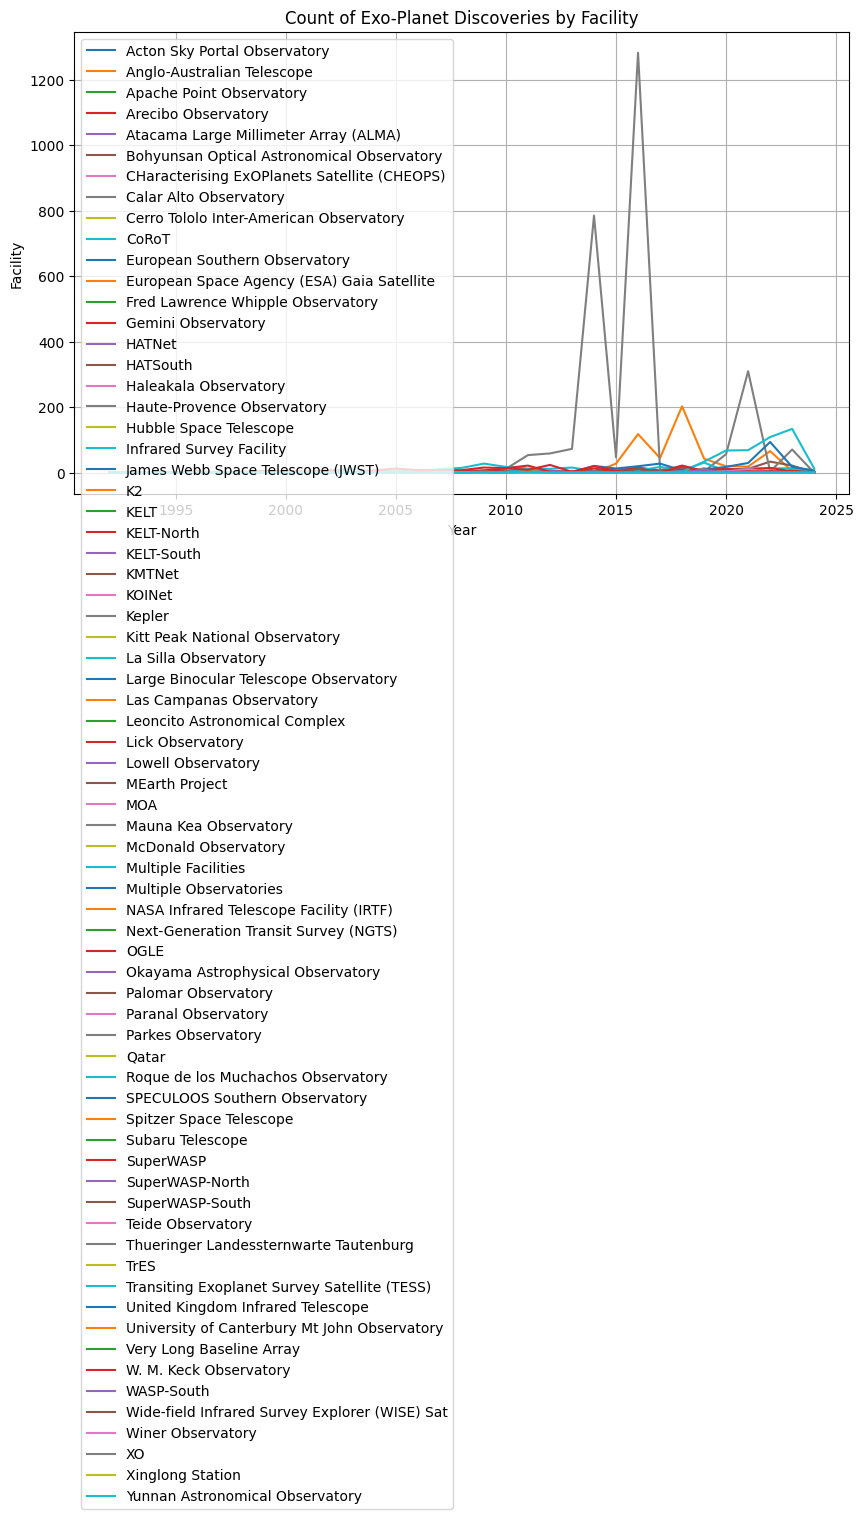

In [171]:
# Group by 'discoverymethod' and 'disc_year', and calculate the count of each group
grouped_data = df.groupby(['disc_facility', 'disc_year']).size().reset_index(name='count')

# Pivot the data to have 'discoverymethod' as columns and 'disc_year' as index

# Plotting
plt.figure(figsize=(10, 6))

for i, column in enumerate(pivot_data.columns):
    plt.plot(pivot_data.index, pivot_data[column], label=column)  # Adjust color by dividing i by total number of columns

plt.xlabel('Year')
plt.ylabel('Facility')
plt.title('Count of Exo-Planet Discoveries by Facility')
plt.legend()
plt.grid(True)
plt.show()

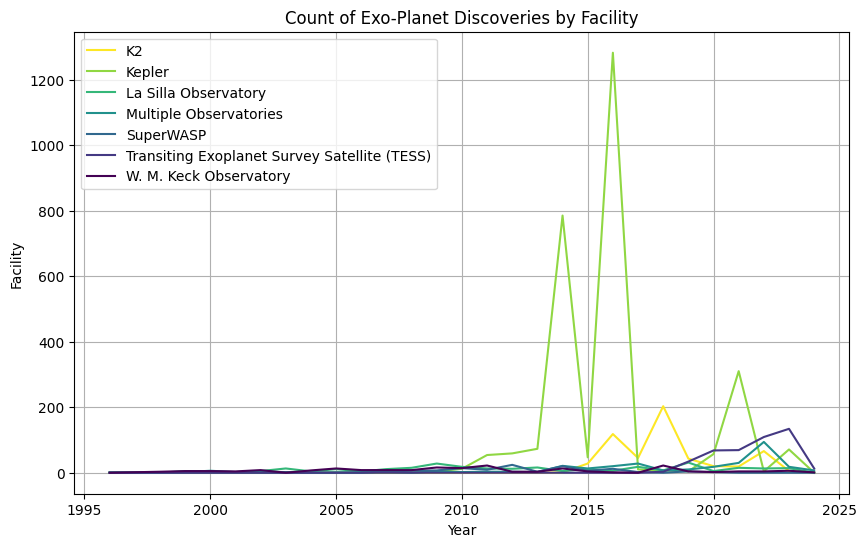

In [190]:
# Group by 'disc_facility' and 'disc_year', and calculate the count of each group
grouped_data = df.groupby(['disc_facility', 'disc_year']).size().reset_index(name='count')

# Calculate total counts for each facility
facility_counts = grouped_data.groupby('disc_facility')['count'].sum()

# Filter out facilities with more than 100 total counts
selected_facilities = facility_counts[facility_counts > 100].index

# Filter the grouped data to include only selected facilities
filtered_data = grouped_data[grouped_data['disc_facility'].isin(selected_facilities)]

# Pivot the filtered data to have 'disc_facility' as columns and 'disc_year' as index
pivot_data = filtered_data.pivot(index='disc_year', columns='disc_facility', values='count').fillna(0)

# Plotting
colors = ['#fde725','#90d743','#35b779','#21918c','#31688e','#443983','#440154']
plt.figure(figsize=(10, 6))

for i, column in enumerate(pivot_data.columns):
    plt.plot(pivot_data.index, pivot_data[column], label=column,color=colors[i % len(colors)])

plt.xlabel('Year')
plt.ylabel('Facility')
plt.title('Count of Exo-Planet Discoveries by Facility')
plt.legend()
plt.grid(True)
plt.show()
